# Assignment 1

Author: Dipesh Poudel

Roll No: 10

## Q.No 1
Write python programs to implement linear regression using Stochastic GD, Batch GD, and mini-batch GD. Capture time needed to train the predict the models and compare each approach (Use data.csv).

### Importing the required Libaries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

### Gettting the Data

Reading the CSV file into pandas dataframe

In [2]:
df = pd.read_csv('data/data.csv',header=None)
df.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


Assigning first column as $X$(Independent Variable) and second column as $y$(Dependent Variable)  

In [3]:
X = df.iloc[:,0]
y = df.iloc[:,1]

### Plotting the Data

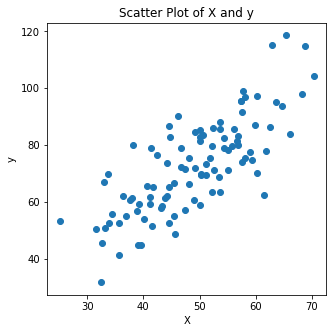

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(X,y)
plt.title("Scatter Plot of X and y")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

From the scatter plot we can see that the relationship between $X$ and $y$ is linear.

### Batch Gradient Descent

In batch gradient descent we update the parameters(weights) once per epoch 

#### Training the Model

In [5]:
## %%timeit
w0 = 0 
w1 = 0
lr = 0.0001
epochs = 1000
n=float(len(X))
for i in range(epochs):
    y_pred = w0+w1*X
    delw0 = (-2/n)*sum(y-y_pred)
    delw1 = (-2/n)*sum(X*(y-y_pred))
    w0=w0-lr*delw0
    w1=w1-lr*delw1
    if i%100==0:
        print(f"Iteration {i}\n w0 = {w0}\tw1 = {w1}")

Iteration 0
 w0 = 0.014547010110737297	w1 = 0.7370702973591055
Iteration 100
 w0 = 0.03513502002912928	w1 = 1.4788015372774521
Iteration 200
 w0 = 0.04113767542736797	w1 = 1.4786835569145387
Iteration 300
 w0 = 0.047135801867800996	w1 = 1.4785656655669113
Iteration 400
 w0 = 0.05312940276749255	w1 = 1.4784478631674083
Iteration 500
 w0 = 0.059118481540928546	w1 = 1.478330149648919
Iteration 600
 w0 = 0.06510304160001894	w1 = 1.4782125249443832
Iteration 700
 w0 = 0.07108308635409932	w1 = 1.4780949889867918
Iteration 800
 w0 = 0.07705861920993279	w1 = 1.4779775417091856
Iteration 900
 w0 = 0.08302964357171239	w1 = 1.4778601830446565


#### Making the Predictions

In [6]:
y_pred = w0+w1*X

#### Plotting the Result

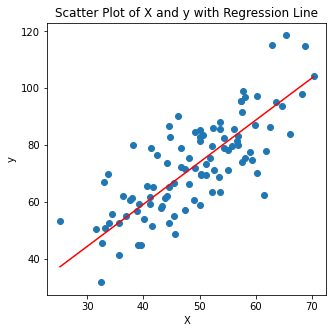

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(X,y)
plt.plot([min(X),max(X)],[min(y_pred),max(y_pred)],color='red')
plt.title("Scatter Plot of X and y with Regression Line")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### Model Evaluation

In [8]:
def model_evaluate(y,y_pred):
    mae = metrics.mean_absolute_error(y, y_pred)
    mse = metrics.mean_squared_error(y, y_pred)
    r2 = metrics.r2_score(y, y_pred)
    print("The model performance")
    print("--------------------------------------")
    print(f'MAE is {mae}')
    print(f'MSE is {mse}')
    print('R2 score is {}'.format(r2))

In [9]:
model_evaluate(y,y_pred)

The model performance
--------------------------------------
MAE is 8.422711763776555
MSE is 112.6148101161347
R2 score is 0.5900746017527791


The value of R2 is 0.59 which means the model was able to explain 59% variance in dependent variable caused by independent variable

### Stochastic Gradient Descent

In Stochastic Gradient Descent, we update the weights for each data point

In [10]:
##%%timeit
w0 = 0
w1 = 0
lr = 0.0001
epochs = 1000
n=float(len(X))
for i in range(epochs):
    for j in range(len(X)):
        y_pred = w0+w1*X[j]
        delw0 = (-2/n)*sum(y-y_pred)
        delw1 = (-2/n)*sum(X[j]*(y-y_pred))
        w0=w0-lr*delw0
        w1=w1-lr*delw1
    if i%100==0:
        print(f"Iteration {i}\n w0 = {w0}\tw1 = {w1}")

Iteration 0
 w0 = 0.09153650246648085	w1 = 1.6369825710274306
Iteration 100
 w0 = 5.635380287741265	w1 = 1.5120550290228583
Iteration 200
 w0 = 10.75614151269468	w1 = 1.3966614252699978
Iteration 300
 w0 = 15.486108037479578	w1 = 1.2900741701826863
Iteration 400
 w0 = 19.855103650195204	w1 = 1.1916212007149922
Iteration 500
 w0 = 23.89067611437804	w1 = 1.100681742812011
Iteration 600
 w0 = 27.618270865508453	w1 = 1.0166823972523873
Iteration 700
 w0 = 31.061391451739492	w1 = 0.939093524202663
Iteration 800
 w0 = 34.24174773047183	w1 = 0.8674259036870631
Iteration 900
 w0 = 37.17939275519749	w1 = 0.8012276509159942


In [11]:
y_pred = w0+w1*X

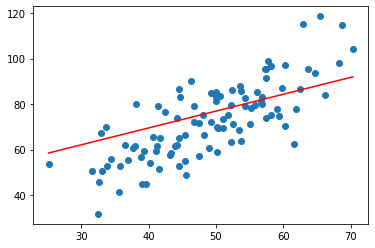

In [12]:
plt.scatter(X,y)
plt.plot([min(X),max(X)],[min(y_pred),max(y_pred)],color='red')
plt.show()

In [13]:
model_evaluate(y,y_pred)

The model performance
--------------------------------------
MAE is 10.234735478223454
MSE is 153.60245153544815
R2 score is 0.4408768611119228


### Mini Batch Gradient Descent

In Mini Batch Gradi